# Lab 06.a: Introduction to Retrieval Augmented Generation (RAG)

所有基礎模型都是在特定時間點的數據快照上進行訓練的。因此，它們只知道訓練語料中包含的事實。例如，如果問基礎模型今天的天氣如何，以及是否帶家人去海灘是個好主意，它可能無法回答你的問題。這種限制源於今天的天氣數據並不包含在其訓練數據中。

<center><img src="https://github.com/buckylee2019/watsonx_incubation_tw/blob/main/lab06_Building%20Question-Answering%20with%20watsonx.ai%20and%20Retrieval%20Augmented%20Generation/imgs/diag_rag_1.png?raw=true" width="800" alt="Diagram of user interacting with FM"></center><br>



我們可以在 [**watsonx.ai**](https://watsonx.ai) 比較兩個模型, 並測試他的結果
首先, 先試試 `google/flan-ul2` 模型.

<center><img src="https://github.com/buckylee2019/watsonx_incubation_tw/blob/main/lab06_Building%20Question-Answering%20with%20watsonx.ai%20and%20Retrieval%20Augmented%20Generation/imgs/rag_1.png?raw=true" width="800" alt="Flan-UL2 trying to answer questions about today's weather"></center><br>

接著, 試試透過instruction 微調過的 `ibm/mpt-7b-instruct2` 模型.

<center><img src="https://github.com/buckylee2019/watsonx_incubation_tw/blob/main/lab06_Building%20Question-Answering%20with%20watsonx.ai%20and%20Retrieval%20Augmented%20Generation/imgs/rag_2.png?raw=true"  width="800" alt="MPT-7b-Instruct2 trying to answer questions about today's weather"></center><br>

不幸的是，這些結果都不令人滿意。這是因為這些模型都沒有受過今天的天氣數據的訓練。然而，基礎模型是通過廣泛的數據集進行訓練，涵蓋了各種各樣的主題，使它們在語言學方面熟練，並能夠從最近的事實或訓練期間未包含的信息中學習，比如從您的企業數據中學習。

**檢索增強生成**（或簡稱**RAG**）是一種用於檢索關於特定主題的相關數據並通過您的提示將其作為上下文提供給基礎模型的技術。

以相同的目標為前提，如果我們能將天氣API數據作為上下文傳遞給模型並重新詮釋相同的問題，你認為它能夠生成一個回答嗎？

藉由提供天氣API數據作為上下文，基礎模型可能能夠生成更具相關性的回答，因為它會有關於今天的天氣的信息。然而，模型的能力仍然受限於其訓練數據的範圍，如果沒有涵蓋有關特定天氣情況的足夠信息，回答仍可能不夠準確。這種技術可以改進回答的質量，但取決於可用的數據和模型的能力。
<center><img src="https://github.com/buckylee2019/watsonx_incubation_tw/blob/main/lab06_Building%20Question-Answering%20with%20watsonx.ai%20and%20Retrieval%20Augmented%20Generation/imgs/diag_rag_2.png?raw=true" width="800" alt="Diagram of user interacting with FM within a context"></center><br>

讓我們實際看看

<center><img src="https://github.com/buckylee2019/watsonx_incubation_tw/blob/main/lab06_Building%20Question-Answering%20with%20watsonx.ai%20and%20Retrieval%20Augmented%20Generation/imgs/rag_3.png?raw=true" width="800" alt="MPT-7b-Instruct2 working with context"></center><br>

相同的原則適用於文檔。假設你希望你的模型回答有關一段文字的問題，那麼你可以將這段文字作為上下文傳遞，並讓你的模型回答相關的問題。

為了證明這一點，我們可以問一個基礎模型誰是美國的總統。然而，它們中的任何一個都不太可能提供簡潔和可靠的答案。例如，`GPT-3.5` 提供了以下回應：

> *"As of my last knowledge update in September 2021, the President of the United States was Joe Biden. However, please note that my information might be outdated, and I don't have browsing capabilities to access real-time data. If the current date is after September 2021, I recommend checking a reliable news source or performing a quick online search to find the most up-to-date information on the current President of the United States."*

如果我們使用與上述相同的方法並為我們的模型提供一些上下文，這些將是結果。

<center><img src="https://github.com/buckylee2019/watsonx_incubation_tw/blob/main/lab06_Building%20Question-Answering%20with%20watsonx.ai%20and%20Retrieval%20Augmented%20Generation/imgs/rag_4.png?raw=true" width="800" alt="MPT-7b-Instruct2 working with context"></center><br>

我們可以使用多個不同的數據來源來增強我們的提示，例如文件、數據庫、存儲庫或API。然而，為了使這個過程實用且負擔得起，我們需要進行一些步驟。

現在，我們考慮一種情況，你希望你的模型回答有關一本潛水艇手冊的問題，而這本手冊跨足了492頁。你可能會想知道我們是否可以將這本手冊作為上下文傳遞嗎？

對於基礎模型來說，通常不適合將一本492頁的手冊作為上下文，因為這樣的上下文過於龐大，模型可能難以處理。通常，我們會希望提供更精簡和相對較小範圍的上下文，以確保模型能夠有效地處理並生成相應的答案。這可能包括提取手冊中的特定部分或有關特定主題的摘要，而不是整本手冊。

<center><img src="https://github.com/buckylee2019/watsonx_incubation_tw/blob/main/lab06_Building%20Question-Answering%20with%20watsonx.ai%20and%20Retrieval%20Augmented%20Generation/imgs/diag_rag_3.png?raw=true" width="800" alt="Diagram of user interacting with FM within a context"></center><br>

這絕對不是最佳的方法。首先，你可能已經注意到的，所有基礎模型都有一個**上下文**，它基本上代表它們可以處理的最大標記數。這個訊息顯示在我們的Prompt Studio頁面底部。傳送整本手冊無疑會超過**任何**基礎模型的最大標記限制。

即使可能傳送整本手冊，模型的API每次使用都是基於使用的標記數來計費的。因此，我們的提示越長，成本就越高。想像一下為每個問題處理這麼多的標記！

這就是**語義查詢**(Semantic Search)發揮作用的地方。

## Semantic Search

想法是將整個文檔，或我們的文件集，轉換為更小的文本片段。有許多不同的方法可以實現這一目標，我們可以在接下來的討論中深入探討。但主要的觀點是我們需要將它分解成較小的文本片段。這樣可以更有效地處理和檢索相關訊息，並使整個過程更實用和負擔得起。

<center><img src="https://github.com/buckylee2019/watsonx_incubation_tw/blob/main/lab06_Building%20Question-Answering%20with%20watsonx.ai%20and%20Retrieval%20Augmented%20Generation/imgs/diag_rag_4.png?raw=true" width="200" alt="Breaking a documento into chunks"></center><br>

獲得這些較小的文本片段後，我們的目標是接收用戶的問題，並識別哪些文本片段更有可能包含答案。為了確定這種相似性，我們需要將每個文本片段（包括問題本身）轉換成嵌入。

一旦我們將文本片段表示為向量，我們可以測量它們之間的距離。通過這樣做，我們可以識別手冊的哪些部分在語義上更接近我們的問題。因此，我們只傳遞最相關的手冊部分作為上下文，而不是發送全部內容。

如果你對這個過程不完全理解，不用擔心。讓我們一起執行代碼，看看是否能解決你的疑問。

----------

# RAG in Practice

在這個實驗中，我們將開發一個RAG，用於回答有關單個PDF文件的問題，以保持簡單。你可以使用提供的資料夾中的PDF文件，或者使用自己的文件。

## Installing the Libraries

In [ ]:
!pip3 install requests
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install ibm-watson-machine-learning

!pip3 install langchain
!pip3 install pypdf
!pip3 install chromadb
!pip3 install sentence-transformers

## Importing the Libraries

In [1]:
#import fitz
import os
import re
import requests

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from chromadb.api.types import EmbeddingFunction
from dotenv import load_dotenv

from ibm_watson_machine_learning.foundation_models import Model
from ibm_watson_machine_learning.metanames import GenTextParamsMetaNames as GenParams

from langchain.document_loaders import PyPDFLoader
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

from typing import Literal, Optional, Any

## Pre-download embedding function

In [2]:
%%time
# Load the model from TF Hub (might have connection issue)
class MiniLML6V2EmbeddingFunction(EmbeddingFunction):
    MODEL = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
    def __call__(self, texts):
        return MiniLML6V2EmbeddingFunction.MODEL.encode(texts).tolist()
        
emb_function = MiniLML6V2EmbeddingFunction()

CPU times: user 2.31 s, sys: 328 ms, total: 2.64 s
Wall time: 2.53 s


## PDF to Text

當然，我們的第一步是從PDF文件中提取文字。我們還將對此文本進行預處理，以去除換行和多餘的空格，以保持簡潔和乾淨。

我們定義兩個輔助函數來執行這些操作。

In [3]:
def pdf_to_text(path: str,
                start_page: int = 1,
                end_page: Optional[int or None] = None) -> list[str]:
    """
    Converts PDF to plain text.

    Params:
        path (str): Path to the PDF file.
        start_page (int): Page to start getting text from.
        end_page (int): Last page to get text from.
    """
    loader = PyPDFLoader(path)
    pages = loader.load()
    total_pages = len(pages)

    if end_page is None:
        end_page = len(pages)

    text_list = []
    for i in range(start_page-1, end_page):
        text = pages[i].page_content
        text = text.replace('\n', ' ')
        text = re.sub(r'\s+', ' ', text)
        text_list.append(text)

    return text_list

在定義了我們的函數之後，我們可以開始處理我們的PDF文件。

選擇一個可用的文件，或者使用自己的文件。

然後，我們將在下方印出文件的內容。

In [4]:
# PDF files available:
#    "pdfs/pie_recipe.pdf"
#    "pdfs/paper_flowers.pdf"

text_list = pdf_to_text("pdfs/Hiace.pdf")

In [5]:
print(text_list[:2])

['', '1 65432 87 9圖片索引 依圖片搜尋 安全及防盜請務必閱讀此內容 (主要章節：兒童座椅、防盜系統 ) 車輛狀態資訊與 指示燈閱讀行駛相關資訊 (主要章節：儀表、多功能資訊顯示幕 ) 行車前開啟及關閉車門及車窗，行車前調整 (主要章節：鑰匙、車門、座椅、電動窗 ) 行駛時行車時必要的操作及建議 (主要章節：啟動引擎、加油 ) 音響系統操作音響系統 (主要章節：音響、電話 ) 車內功能使用內部功能 (主要章節：空調、儲藏功能 ) 保養與照料照料您的車輛及保養程序 (主要章節：內裝與外觀、燈泡 ) 緊急狀況處理如果發生故障及緊急情況要怎麼辦 (主要章節：電瓶沒電、輪胎沒氣 ) 車輛規格車輛規格、可個人化的功能 (主要章節：燃油、機油、胎壓 ) 索引 如果…怎麼辦pM_HIACE_OM_OM26A65E_(GE).book Page 1 Friday, September 25, 2 020 11:30 AM']


## Text to Chunks

在提取和處理文本之後，下一步是將其分成均勻分佈的文本片段。

正如先前提到的，有各種不同的方法和技術可供選擇，我們需要找到最適合我們用例的方法。

在這裡，我們將使用一種通用的方法，以頁為單位，將頁定義為一個片段。

另外，我們的函數會記錄每個片段的頁碼。

In [6]:
def text_to_chunks(texts: list[str],
                   start_page: int = 1) -> list[list[str]]:
    """
    Splits the text into equally distributed chunks.

    Args:
        texts (str): List of texts to be converted into chunks.
        word_length (int): Maximum number of words in each chunk.
        start_page (int): Starting page number for the chunks.
    """
    text_toks = [t.split(' ') for t in texts]
    chunks = []

    for idx, words in enumerate(text_toks):

        chunk = ' '.join(words).strip()
        chunk = f'[Page no. {idx+start_page}]' + ' ' + '"' + chunk + '"'
        chunks.append(chunk)

    return chunks

In [7]:
chunks = text_to_chunks(text_list)

In [8]:
for chunk in chunks[:2]:
    print(chunk + '\n')

[Page no. 1] ""

[Page no. 2] "1 65432 87 9圖片索引 依圖片搜尋 安全及防盜請務必閱讀此內容 (主要章節：兒童座椅、防盜系統 ) 車輛狀態資訊與 指示燈閱讀行駛相關資訊 (主要章節：儀表、多功能資訊顯示幕 ) 行車前開啟及關閉車門及車窗，行車前調整 (主要章節：鑰匙、車門、座椅、電動窗 ) 行駛時行車時必要的操作及建議 (主要章節：啟動引擎、加油 ) 音響系統操作音響系統 (主要章節：音響、電話 ) 車內功能使用內部功能 (主要章節：空調、儲藏功能 ) 保養與照料照料您的車輛及保養程序 (主要章節：內裝與外觀、燈泡 ) 緊急狀況處理如果發生故障及緊急情況要怎麼辦 (主要章節：電瓶沒電、輪胎沒氣 ) 車輛規格車輛規格、可個人化的功能 (主要章節：燃油、機油、胎壓 ) 索引 如果…怎麼辦pM_HIACE_OM_OM26A65E_(GE).book Page 1 Friday, September 25, 2 020 11:30 AM"



## Text Embeddings

現在是將這些文本片段轉換為嵌入的時候，這些嵌入表示為多維向量。為了實現這一目標，我們使用了Hugging Face的高品質模型。該模型將文本編碼為高維向量，可用於文本分類、語義相似性、聚類和其他自然語言任務。

這個特定模型將我們的文本編碼為384維向量。讓我們在實作中觀察這個過程。

首先，我們將載入我們的模型，然後定義一個輔助函數來生成這些嵌入並將它們堆疊在一起。

<div class="alert alert-info">
     
### Note

You can either download the Universsal Sentence Encoder from this [link](https://tfhub.dev/google/universal-sentence-encoder/4?tf-hub-format=compressed), extract it and have it as a folder called '***universal-sentence-encoder_4***' in the same folder as this notebook. By doing so you will load it locally and the next cell will run much faster.

Or, you can load it from the internet. This will take longer, because the next cell will download 915MB while running.
     
</div>

In [9]:
def get_text_embedding(texts: list[list[str]],
                       batch: int = 1000) -> list[Any]:
        """
        Get the embeddings from the text.

        Args:
            texts (list(str)): List of chucks of text.
            batch (int): Batch size.
        """
        embeddings = []
        for i in range(0, len(texts), batch):
            text_batch = texts[i:(i+batch)]
            # Embeddings model
            emb_batch = emb_function(text_batch)
            embeddings.append(emb_batch)
        embeddings = np.vstack(embeddings)
        return embeddings

讓我們將我們的文本片段轉換為嵌入，並觀察它們的維度。

我們印出第一個嵌入，看看它是什麼樣子。

In [10]:
embeddings = get_text_embedding(chunks)

print(embeddings.shape)
print(f"Our text was embedded into {embeddings.shape[1]} dimensions")

(107, 768)
Our text was embedded into 768 dimensions


In [11]:
print(embeddings[0])

[ 1.02607749e-01 -1.45914793e-01 -1.43395979e-02  6.37424439e-02
 -2.68747415e-02  8.80483836e-02  1.80010125e-01  7.79817328e-02
  5.31356223e-02  1.44148976e-01  1.61378026e-01  4.27948833e-02
  6.36029383e-03  8.19501430e-02  1.18325710e-01 -1.68131143e-01
  8.70788172e-02  6.83944970e-02  5.37357442e-02  7.31900409e-02
 -3.38021405e-02  1.88786425e-02  5.12580574e-02 -6.46502078e-02
 -4.00075875e-02 -4.60810959e-02 -4.27782461e-02  1.51268944e-01
  6.10455796e-02 -5.96087463e-02  9.36523378e-02  3.80012058e-02
  1.24874927e-01 -1.46699071e-01  6.51366115e-02 -3.03545408e-02
 -1.20228931e-01  2.25580446e-02 -1.68929875e-01 -3.78055871e-02
  5.69976047e-02 -1.57672465e-01 -5.03490493e-02 -5.45721762e-02
 -1.97191864e-01 -8.62430856e-02  4.71192598e-03  2.15812296e-01
  3.99038102e-03  9.11493376e-02  5.57521032e-03 -3.87350209e-02
  4.49546166e-02  1.20592462e-02  3.26541573e-01 -2.46657297e-01
 -6.14216328e-02 -2.81008743e-02 -8.13920051e-03 -2.74152569e-02
 -4.50397506e-02  7.02776

Next, we will do the same with our question.

Let's check how the shape of our encoded question looks like.

In [12]:
# question = 'How many people does this pie serve?'
question = '如何使用安全帶?'
emb_question = emb_function([question])

## Visualizing the Semantic Search

由於對於我們人類來說，難以可視化超過三個維度（想像一下384個維度），我們將降低我們的嵌入的維度。

我們將使用t-SNE算法將其降低到兩個維度，以便我們可以可視化我們的數據。

In [13]:
# Create a t-SNE model
tsne = TSNE(n_components=2, random_state=42)
embeddings_with_question = np.vstack([embeddings, emb_question])
embeddings_2d = tsne.fit_transform(embeddings_with_question)

In [14]:
embeddings_2d.shape

(108, 2)

請注意，現在，每個數據點（代表一段文本）將具有兩個維度。

讓我們創建一個輔助函數，以便在向量空間中可視化我們的數據點。

In [15]:
def visualize_embeddings(embeddings_2d: np.ndarray,
                         question: Optional[bool] = False,
                         neighbors: Optional[np.ndarray] = None) -> None:
    """
    Visualize 384-dimensional embeddings in 2D using t-SNE, label each data point with its index,
    and optionally plot a question data point as a red dot with the label 'q'.

    Args:
        embeddings (numpy.array): An array of shape (num_samples, 384) containing the embeddings.
        question (numpy.array, optional): An additional 384-dimensional embedding for the question.
                                          Default is None.
    """

    # Scatter plot the 2D embeddings and label each data point with its index
    plt.figure(figsize=(10, 8))
    num_samples = embeddings.shape[0]
    if neighbors is not None:
        for i, (x, y) in enumerate(embeddings_2d[:num_samples]):
            if i in neighbors:
                plt.scatter(x, y, color='purple', alpha=0.7)
                plt.annotate(str(i), xy=(x, y), xytext=(5, 2), textcoords='offset points', color='black')
            else:
                plt.scatter(x, y, color='blue', alpha=0.7)
                plt.annotate(str(i), xy=(x, y), xytext=(5, 2), textcoords='offset points', color='black')
    else:
        for i, (x, y) in enumerate(embeddings_2d[:num_samples]):
            plt.scatter(x, y, color='blue', alpha=0.7)
            plt.annotate(str(i), xy=(x, y), xytext=(5, 2), textcoords='offset points', color='black')

    # Plot the question data point if provided
    if question:
        x, y = embeddings_2d[-1]  # Last point corresponds to the question
        plt.scatter(x, y, color='red', label='q')
        plt.annotate('q', xy=(x, y), xytext=(5, 2), textcoords='offset points', color='black')

    plt.title('t-SNE Visualization of 384-dimensional Embeddings')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

讓我們在向量空間中看看我們所有的數據點。

這意味著，我們將看到從我們的PDF文件中提取的文本片段的2維表示。

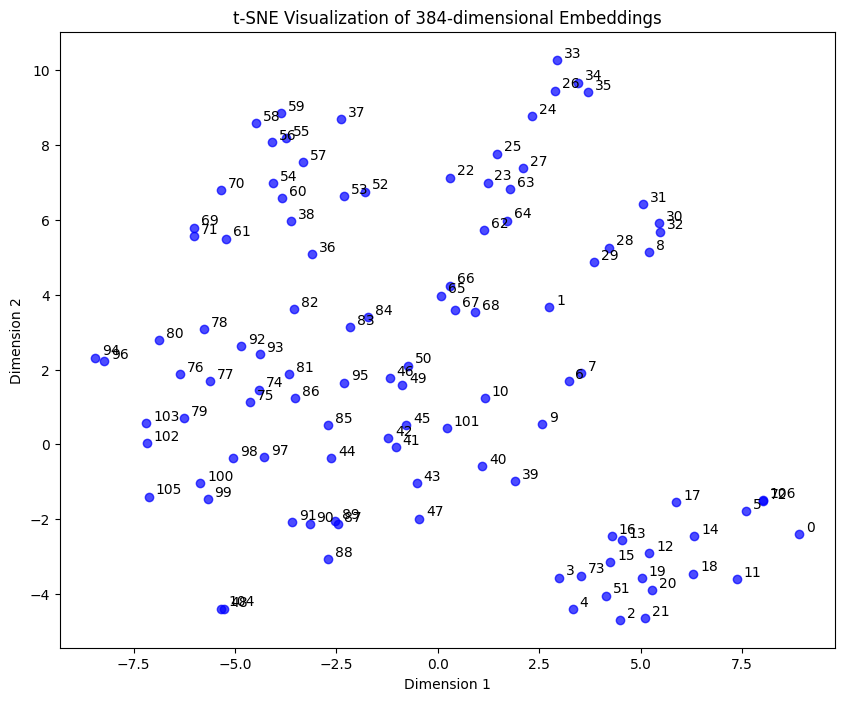

In [16]:
visualize_embeddings(embeddings_2d[:-1])

We'll also locate our **<span style="color: red">question</span>** is in this vector space.

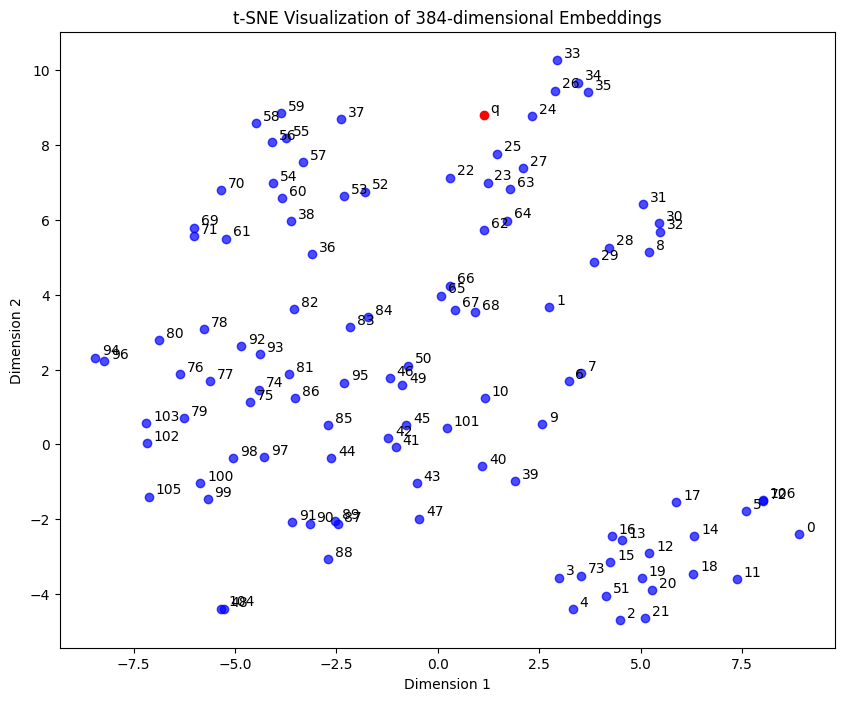

In [17]:
visualize_embeddings(embeddings_2d, True)

接下來，我們需要找到語義上更接近我們問題的文本片段。這些文本片段更有可能包含我們問題的答案。

有多種方法可以實現這一目標，我們將使用**歐幾里得距離**來衡量數據點的相似性/接近度。

為此，我們將使用**最近鄰居**(NearestNeighbors)算法，找到距離我們問題最接近的前`k`個數據點。在我們的示例中，我們將默認檢索前5個數據點。

In [18]:
nn_2d = NearestNeighbors(n_neighbors=5, metric='cosine')
nn_2d.fit(embeddings_2d[:-1])

NearestNeighbors(metric='cosine')

In [19]:
neighbors = nn_2d.kneighbors(embeddings_2d[-1].reshape(1, -1), return_distance=False)
neighbors

array([[67, 23, 66, 25, 62]])

Let's now plot the closest points as **<span style="color: purple">purple</span>**.

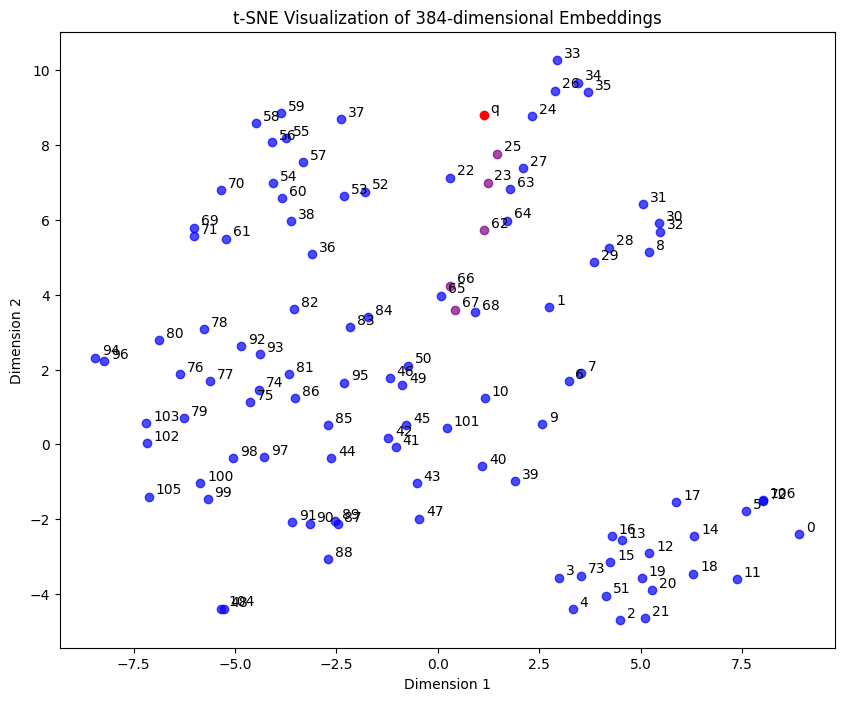

In [20]:
visualize_embeddings(embeddings_2d, True, neighbors)

## Semantic Search

由於t-SNE是一個非線性算法，在這個過程中我們會失去一些信息，所以我們將不使用2維向量，這些僅用於可視化目的。

我們將重複上述過程，但改為使用完整的384維向量。

再次套用我們的 NearestNeighbors，使用完整大小的嵌入。

In [30]:
nn = NearestNeighbors(n_neighbors=3, metric='cosine')
nn.fit(embeddings)

NearestNeighbors(metric='cosine', n_neighbors=3)

再次將我們的問題轉成嵌入

In [31]:
# question = 'How many people does this pie serve?'
question = '如何使用安全帶?'
emb_question = emb_function([question])

最後取得我們的文本片段

In [32]:
neighbors = nn.kneighbors(emb_question, return_distance=False)
neighbors

array([[25, 27, 24]])

這樣一來，我們擁有最有可能回答我們問題的**前5**個文本片段。

In [33]:
topn_chunks = [chunks[i] for i in neighbors.tolist()[0]]

## Prompt Building

現在是建立我們的Prompt的時候。

請記住，我們需要將我們的上下文傳遞給Prompt。在這種情況下，我們將我們的上下文稱為*"Search results"* - 名稱並不重要；

我們將遍歷我們的頂部文本片段，並將它們附加到提示中。

最後，我們將向我們的模型提供指示，提出我們的問題，然後收到我們的答案。

In [60]:
def build_prompt(question):

    prompt = """
[INST] <<SYS>>You are an AI assistant tasked with providing answers by summarizing related documents. You should follow these rules:
1. Summarize the content from the provided documents, using the following format:
文件標題: Describe the topic of the document.
按步指示: Provide user question-specific instructions or information from the document.
2. If no relevant information is found in the chat history, respond with "I can't answer the question".
By adhering to these rules, you will help users find accurate and valuable information.
<</SYS>>\n"""

    prompt += 'Context:\n'

    for c in topn_chunks:
        prompt += c + '\n\n'
    prompt += f"User: {question}\n\nAnswer the question in Markdown format.\nMarkdown:[/INST]"

    return prompt

In [58]:
prompt = build_prompt(question)
print(prompt)


[INST] <<SYS>>You are an AI assistant tasked with providing answers by summarizing related documents. You should follow these rules:
1. Summarize the content from the provided documents, using the following format:
文件標題: Describe the topic of the document.
按步指示: Provide user question-specific instructions or information from the document.
2. If no relevant information is found in the chat history, respond with "I can't answer the question".
By adhering to these rules, you will help users find accurate and valuable information.
<</SYS>>


[INST] <<SYS>>You are an AI assistant tasked with providing answers by summarizing related documents. You should follow these rules:
1. Summarize the content from the provided documents, using the following format:
文件標題: Describe the topic of the document.
按步指示: Provide user question-specific instructions or information from the document.
2. If no relevant information is found in the chat history, respond with "I can't answer the question".
By adherin

# watsonx.ai Inference

為了完成我們的程式，現在只需將提示發送給我們的模型，並根據我們提供的內容收到它的答案。

我們將配置我們的環境，使用我們的憑證，定義一個輔助函數，最後進行推理。

In [27]:
# Config watsonx.ai environment

# load_dotenv()
# api_key = os.getenv("API_KEY", None)
# ibm_cloud_url = os.getenv("IBM_CLOUD_URL", None)
# project_id = os.getenv("PROJECT_ID", None)
import getpass
api_key = getpass.getpass("Please enter your WML api key (hit enter): ")
ibm_cloud_url = "https://us-south.ml.cloud.ibm.com/"
project_id = getpass.getpass("Please enter your Project ID (hit enter): ")

if api_key is None or ibm_cloud_url is None or project_id is None:
    print("Ensure you copied the .env file that you created earlier into the same directory as this notebook")
else:
    creds = {
        "url": ibm_cloud_url,
        "apikey": api_key
    }

In [28]:
def send_to_watsonxai(prompts,
                    model_name="meta-llama/llama-2-70b-chat",
                    decoding_method="greedy",
                    max_new_tokens=512,
                    min_new_tokens=0,
                    repetition_penalty=1.0
                    ):
    '''
   helper function for sending prompts and params to Watsonx.ai

    Args:
        prompts:list list of text prompts
        decoding:str Watsonx.ai parameter "sample" or "greedy"
        max_new_tok:int Watsonx.ai parameter for max new tokens/response returned
        temperature:float Watsonx.ai parameter for temperature (range 0>2)
        repetition_penalty:float Watsonx.ai parameter for repetition penalty (range 1.0 to 2.0)

    Returns: None
        prints response
    '''


    # Instantiate parameters for text generation
    model_params = {
        GenParams.DECODING_METHOD: decoding_method,
        GenParams.MIN_NEW_TOKENS: min_new_tokens,
        GenParams.MAX_NEW_TOKENS: max_new_tokens,
        GenParams.RANDOM_SEED: 42,
        GenParams.TEMPERATURE: 0,
        GenParams.REPETITION_PENALTY: repetition_penalty,
    }


    # Instantiate a model proxy object to send your requests
    model = Model(
        model_id=model_name,
        params=model_params,
        credentials=creds,
        project_id=project_id)


    for prompt in prompts:
        print(model.generate_text(prompt))


Below, we have a few examples of questions to use with both PDF files available.

Feel free to choose any of them or come up with your own questions to test your new application!

In [61]:
# Example questions for the DQ2:
#   儀表板為何會自動亮起?
#   行車前需要注意什麼？?
#   我啟動引擎的方式
#   如果擋風玻璃噴水器無法噴灑清洗液


question = "如何使用安全帶?"
prompt = build_prompt(question)

send_to_watsonxai(prompts=[prompt], min_new_tokens=1)

  # 安全帶使用方法

根據頁面 25、26 和 28 的內容，以下是使用安全帶的正確方法：

1. 確保所有乘客都已繫妥安全帶，包括兒童。
2. 隨時正確地繫妥安全帶，每條安全帶只限一個人使用。
3. 為使乘坐的位置正確，不可過度傾斜座椅。端正坐直並向後坐貼緊椅背。
4. 不可將安全帶肩帶穿過腋下。
5. 隨時保持安全帶放低且服貼地橫跨臀部。
6. 依照中華民國道路交通安全規則第八十九條之第五款規定：「駕駛人、前座及小型車後座乘客均應繫妥安全帶」。
7. 只能將安全帶用於對應的座椅上。例如，請勿將右後安全帶用於左後座椅上。
8. 孕婦如同其他乘客一樣要將腰部安全帶橫跨臀部且越低越好，拉伸肩部安全帶使其完全跨過肩膀，
